# OpenAI Basics: Complete Guide to Core Concepts

This comprehensive notebook covers everything you need to know to get started with OpenAI's API, from basic setup to advanced evaluation techniques.

## 📋 What You'll Learn

- **API Setup & Authentication**: Connect to OpenAI securely
- **Chat Completions**: Generate text with GPT models
- **Model Selection**: Choose the right model for your task
- **Parameter Tuning**: Control creativity, length, and behavior
- **Prompt Engineering**: Craft effective prompts
- **Evaluation Techniques**: Test and measure AI performance
- **External Model Evaluation**: Compare with other AI models
- **All Core OpenAI Services**: Text, Vision, Embeddings, Moderation, TTS

## 🎯 Prerequisites

- OpenAI API key (get from [platform.openai.com](https://platform.openai.com))
- Python environment with required packages
- Basic understanding of Python

## 📚 OpenAI Core Services Overview

| Service | Purpose | Key Models |
|---------|---------|------------|
| **Chat Completions** | Text generation & conversation | GPT-4o, GPT-4o-mini, GPT-3.5-turbo |
| **Vision** | Image understanding & analysis | GPT-4o, GPT-4-vision-preview |
| **Embeddings** | Text similarity & semantic search | text-embedding-3-small/large |
| **Moderation** | Content safety & filtering | text-moderation-latest |
| **Text-to-Speech** | Voice synthesis | tts-1, tts-1-hd |
| **Speech-to-Text** | Audio transcription | whisper-1 |
| **Image Generation** | AI art creation | DALL-E 3, DALL-E 2 |
| **Fine-tuning** | Custom model training | Base models + your data |

---
*Ready to dive in? Let's start with the basics!* 🚀

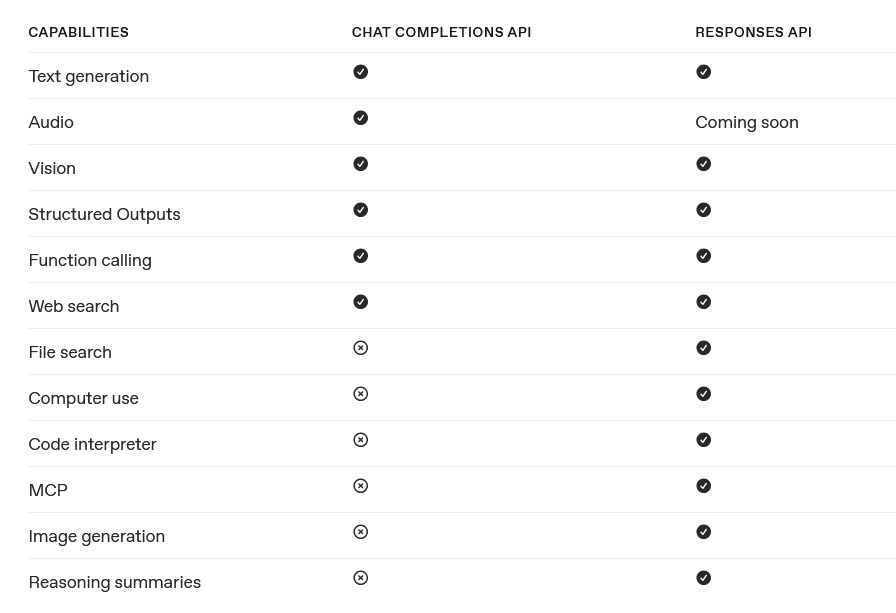

## 1. Setup & Authentication

First, let's install the necessary libraries and set up our environment. We'll use `getpass` to securely handle the API key if it's not already set in the environment.

In [21]:
# Import required libraries
import os
import getpass
from openai import OpenAI
from dotenv import load_dotenv
import tiktoken
import time
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load environment variables from .env file if available
load_dotenv()

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

In [ ]:
from openai import OpenAI
client = OpenAI()


from langchain_openai import ChatOpenAI
client = ChatOpenAI()


from langchain_openai import AzureChatOpenAI
client = AzureChatOpenAI()


from langchain_anthropic import ChatAnthropic
client = ChatAnthropic()

### Configure API Key
We check if the `OPENAI_API_KEY` is set. If not, we prompt the user to enter it securely.

In [2]:
if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

### Initialize Client
Now we create an instance of the `OpenAI` client. This client will be used for all subsequent API calls.

In [22]:
client = OpenAI()
# print(client) # Uncomment to verify client initialization

In [23]:
bio="rakesh is a software engineer at microsoft. He loves coding in python and exploring new technologies. he was awarded employee of the month in june 2023."

In [ ]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[ {"role":"system" , "content": "Be gentle and professional"},
        {"role": "user", "content": "analyze the {bio} and tell me about his achievements  !"}
        ]
)

SyntaxError: ':' expected after dictionary key (4259302810.py, line 4)

In [27]:
print(response.choices[0].message.content)

Based on the information provided, Rakesh appears to be a dedicated and skilled software engineer at Microsoft with a strong passion for coding in Python and exploring new technologies. Here’s a brief analysis of his achievements:

1. **Position and Role**: As a software engineer at a leading tech company like Microsoft, Rakesh is likely involved in significant projects that contribute to the development and enhancement of software products or solutions. His role requires strong analytical skills, problem-solving abilities, and proficiency in programming languages.

2. **Passion for Python**: Rakesh's love for coding in Python suggests that he has a solid grasp of this versatile programming language, which is popular for its readability and application in various fields, including web development, data analysis, artificial intelligence, and more. This appreciation could reflect his continuous efforts to improve his coding skills and to leverage Python in innovative ways.

3. **Explorin

## 2. Basic Chat Completions

The core of the OpenAI API is the Chat Completions endpoint. It allows you to send a series of messages to the model and receive a response.

### Simple Request
Here we send a single user message to `gpt-4o-mini` asking for a joke.

In [16]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[ {"role":"system" , "content": "Be gentle and professional"},
        {"role": "user", "content": "Tell me how to learn python!"}
        ]
)

In [18]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[ {"role":"system" , "content": "Be gentle and professional"},
        {"role": "user", "content": "WHAT WAS MY PREVIOUS QUESTION!"}
        ]
)

In [19]:
print(response.choices[0].message.content)

I'm sorry, but I don't have access to previous messages in our conversation or your prior questions. How can I assist you today?


### View Response
We extract the content from the response object.

In [17]:
print(response.choices[0].message.content)

Learning Python can be an exciting journey, and there are many effective strategies you can use to grasp this versatile programming language. Here are some steps to help you get started:

1. **Set Clear Goals**: Determine why you want to learn Python. Are you interested in data science, web development, automation, or something else? This will guide your learning path.

2. **Install Python**: Start by downloading and installing Python from the official website (python.org). Ensure you also install an Integrated Development Environment (IDE) like PyCharm, VSCode, or use simpler options like Jupyter Notebook.

3. **Use Online Resources**: There are many free and paid resources available online. Some popular platforms include:
   - **Codecademy**: Offers interactive Python courses.
   - **Coursera**: Provides courses from universities and companies.
   - **edX**: Features university-level courses on Python.
   - **Kaggle**: Great for data science with Python.

4. **Read Books**: Consider 

In [6]:
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    model="gpt-5.2",
    input="Tell me a joke on data science.",

    # input = [ {"role":"system" , "content": "Be gentle and professional"},
    #     {"role": "user", "content": "Tell me a joke on data science."}
    #     ],


    store=False
)

print(response.output_text)


A data scientist walks into a bar and says, “I’ll have a beer.”

The bartender asks, “Want another?”

The data scientist replies, “I don’t know… I need more data.”


In [7]:
print(response)

Response(id='resp_0ba75befd6b8de2f01696c570eaed88195ad20c2c9ea8e28e7', created_at=1768707854.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-5.2-2025-12-11', object='response', output=[ResponseOutputMessage(id='msg_0ba75befd6b8de2f01696c570f117c81959c3c22e51f4b5d98', content=[ResponseOutputText(annotations=[], text='A data scientist walks into a bar and says, “I’ll have a beer.”\n\nThe bartender asks, “Want another?”\n\nThe data scientist replies, “I don’t know… I need more data.”', type='output_text', logprobs=[])], role='assistant', status='completed', type='message')], parallel_tool_calls=True, temperature=1.0, tool_choice='auto', tools=[], top_p=0.98, background=False, conversation=None, max_output_tokens=None, max_tool_calls=None, previous_response_id=None, prompt=None, prompt_cache_key=None, reasoning=Reasoning(effort='none', generate_summary=None, summary=None), safety_identifier=None, service_tier='default', status='completed', text=ResponseTe

# Analyze files

In [8]:
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
    model="gpt-5",
    input=[
        {
            "role": "user",
            "content": [
                {
                    "type": "input_text",
                    "text": "Analyze the letter and provide a summary of the key points.",
                },
                {
                    "type": "input_file",
                    "file_url": "https://www.berkshirehathaway.com/letters/2024ltr.pdf",
                },
            ],
        },
    ]
)

print(response.output_text)

Here are the key points and takeaways from Warren Buffett’s 2025 annual letter to Berkshire Hathaway shareholders:

Core philosophy and culture
- Reporting ethos: Berkshire treats the annual letter as a true report, aiming for candid, owner-oriented communication, including discussion of mistakes (“praise by name, criticize by category”).
- Candor about errors: Buffett stresses quick correction over “thumb-sucking.” He notes using “mistake/error” frequently in recent letters, contrasting with typical corporate “happy talk.”
- Succession: At 94, Buffett says Greg Abel will soon assume the CEO role and continue Berkshire’s reporting ethos.

People and management
- Forest River/Pete Liegl: Anecdote highlighting owner-operator excellence, integrity, and incentive alignment; remarkable performance since Berkshire’s 2005 acquisition.
- Hiring philosophy: School pedigree is irrelevant; innate business talent matters more than credentials. Emphasis on managers’ ability and fidelity.

2024 perf

In [9]:
from openai import OpenAI
client = OpenAI()

file = client.files.create(
    file=open(r"C:\Users\Rakesh\vscode_projects\RAG-Tutorials\data\pdf\Attention_is_all_you_need.pdf", "rb"),
    purpose="user_data"
)

response = client.responses.create(
    model="gpt-5",
    input=[
        {
            "role": "user",
            "content": [
                {
                    "type": "input_file",
                    "file_id": file.id,
                },
                {
                    "type": "input_text",
                    "text": "Who is the author?",
                },
            ]
        }
    ]
)

print(response.output_text)

It has eight authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Łukasz Kaiser, and Illia Polosukhin.


# base64 encoded files

In [ ]:
import base64
from openai import OpenAI
client = OpenAI()

with open(r"C:\Users\Rakesh\vscode_projects\RAG-Tutorials\data\pdf\Attention_is_all_you_need.pdf", "rb") as f:
    data = f.read()

base64_string = base64.b64encode(data).decode("utf-8")

response = client.responses.create(
    model="gpt-5",
    input=[
        {
            "role": "user",
            "content": [
                {
                    "type": "input_file",
                    "filename": "Attention_is_all_you_need.pdf",
                    "file_data": f"data:application/pdf;base64,{base64_string}",
                },
                {
                    "type": "input_text",
                    "text": "What is the author?",
                },
            ],
        },
    ]
)

print(response.output_text)

# Analyze Image

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What sports they are playing?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://images.unsplash.com/photo-1574629810360-7efbbe195018?w=400"
                    }
                }
            ]
        }
    ],
    max_tokens=200
)

print(response.choices[0].message.content)

They are playing soccer (football).


In [ ]:
from openai import OpenAI
import base64

client = OpenAI() 

response = client.responses.create(
    model="gpt-4.1-mini",
    input="Generate an image of gray tabby cat hugging an otter with an orange scarf",
    tools=[{"type": "image_generation"}],
)


#print(response)



#Save the image to a file
image_data = [
    output.result
    for output in response.output
    if output.type == "image_generation_call"
]

if image_data:
    image_base64 = image_data[0]
    with open("cat_and_otter.png", "wb") as f:
        f.write(base64.b64decode(image_base64))

[ImageGenerationCall(id='ig_073d50a15ee8a359006963315b91388190afdf5f683046655c', result='iVBORw0KGgoAAAANSUhEUgAABAAAAAYACAIAAABn4K39AADj5GNhQlgAAOPkanVtYgAAAB5qdW1kYzJwYQARABCAAACqADibcQNjMnBhAAAANvZqdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3VybjpjMnBhOjhmYzYyZDVhLWRkY2ItNDYyYy04MWQwLTg3NzZmMDUzNDNkNAAAAAHBanVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAA5Wp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5hY3Rpb25zLnYyAAAAALRjYm9yoWdhY3Rpb25zgqNmYWN0aW9ubGMycGEuY3JlYXRlZG1zb2Z0d2FyZUFnZW50v2RuYW1lZkdQVC00b/9xZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvdHJhaW5lZEFsZ29yaXRobWljTWVkaWGhZmFjdGlvbm5jMnBhLmNvbnZlcnRlZAAAAKtqdW1iAAAAKGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaGFzaC5kYXRhAAAAAHtjYm9ypWpleGNsdXNpb25zgaJlc3RhcnQYIWZsZW5ndGgZNyhkbmFtZW5qdW1iZiBtYW5pZmVzdGNhbGdmc2hhMjU2ZGhhc2hYICh0kCqcaSeXEDwNFo2aDy8C8SMarhm4nT8izwtpGubNY3BhZEgAAAAAAAAAAAAAAelqdW1iAAAAJ2p1bWRjMmNsABEAEIAAAKoAOJtxA2MycGEuY2xhaW0udjIAAAABumNib3Kmamluc3RhbmNlSUR4LHhtcDppaWQ

In [ ]:
print(response)

Response(id='resp_073d50a15ee8a359006963315b24a48190be188499005472d2', created_at=1768108379.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4.1-mini-2025-04-14', object='response', output=[ImageGenerationCall(id='ig_073d50a15ee8a359006963315b91388190afdf5f683046655c', result='iVBORw0KGgoAAAANSUhEUgAABAAAAAYACAIAAABn4K39AADj5GNhQlgAAOPkanVtYgAAAB5qdW1kYzJwYQARABCAAACqADibcQNjMnBhAAAANvZqdW1iAAAAR2p1bWRjMm1hABEAEIAAAKoAOJtxA3VybjpjMnBhOjhmYzYyZDVhLWRkY2ItNDYyYy04MWQwLTg3NzZmMDUzNDNkNAAAAAHBanVtYgAAAClqdW1kYzJhcwARABCAAACqADibcQNjMnBhLmFzc2VydGlvbnMAAAAA5Wp1bWIAAAApanVtZGNib3IAEQAQgAAAqgA4m3EDYzJwYS5hY3Rpb25zLnYyAAAAALRjYm9yoWdhY3Rpb25zgqNmYWN0aW9ubGMycGEuY3JlYXRlZG1zb2Z0d2FyZUFnZW50v2RuYW1lZkdQVC00b/9xZGlnaXRhbFNvdXJjZVR5cGV4Rmh0dHA6Ly9jdi5pcHRjLm9yZy9uZXdzY29kZXMvZGlnaXRhbHNvdXJjZXR5cGUvdHJhaW5lZEFsZ29yaXRobWljTWVkaWGhZmFjdGlvbm5jMnBhLmNvbnZlcnRlZAAAAKtqdW1iAAAAKGp1bWRjYm9yABEAEIAAAKoAOJtxA2MycGEuaGFzaC5kYXRhAAAAAHtjYm9ypWpleGNsdXNpb25zgaJlc3RhcnQYIWZ

# audio


In [ ]:
import base64
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-audio",
    modalities=["text", "audio"],
    audio={"voice": "alloy", "format": "wav"},
    messages=[
        {
            "role": "user",
            "content": "Is a golden retriever a good family dog?"
        }
    ]
)

print(completion.choices[0])

wav_bytes = base64.b64decode(completion.choices[0].message.audio.data)
with open("dog.wav", "wb") as f:
    f.write(wav_bytes)

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', annotations=[], audio=ChatCompletionAudio(id='audio_6963322f50a4819189c9a8aab330e80b', data='UklGRv////9XQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAAZGF0Yf////8CAAYADAAGAPz/BgAFAAUA//8EAAMA//8CAP7/BwACAAIABQAGAP//AwABAAEABAAAAAEAAQD//wMABgABAPv/AAAHAPz/BQD//wAAAAD/////AwD4//z/BAACAAAABQD+//3//f8CAP7/BQD0/wIAAgD6/wAAAAD///j//v/7////+////wEA+v////r//f////7/AQD+//3//f/+/wAA/P/6////9//9//3//P/9//P//v////n//v/5//z/+v/8//7/+P///////P/9//v//P/+//j/9//4//n/9P/9//3//P/8//r//P8AAPr//f/8//n/+//8/////P/6//7/+f/9//7/9f/+//r//v/8//r//P////z/9v/8//z/+//6//z//P/4//j////5//7////7/wAA/v/9//3//P/9//3/+P/8//z/AwD+//3//P8CAPr/+v8CAP3/+//5////AwD3//z////+//z//P/6//z/9//9//j/9//4//j//P/2//j/+v/8//b//v/0//b/+v/1//r/+//6//j/+f/5//P/+f/5//f/8//3//r/9//0//f/8//z//b/8f/2//L/8v/6//X/9v/6//f/8v/3//f/8//z//r/9v/z//H/8//y//P/9f/z//L/9v/z//z/+v/3////+f/7//j/AAADAAAA/f///wAACAAMAAoACQADAP3/+f/0//n/AA

In [ ]:
import base64
import requests
from openai import OpenAI

client = OpenAI()

# Fetch the audio file
url = "https://cdn.openai.com/API/docs/audio/alloy.wav"
#url="https://www.youtube.com/watch?v=SdIynGco9D0"
response = requests.get(url)
response.raise_for_status()
wav_data = response.content

# Transcribe the audio
with open("temp.wav", "wb") as f:
    f.write(wav_data)

transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open("temp.wav", "rb")
)

print("Transcription:", transcription.text)

# # Clean up
# import os
# os.remove("temp.wav")

Transcription: The sun rises in the east and sets in the west. This simple fact has been observed by humans for thousands of years.


# coding

In [ ]:
from openai import OpenAI
client = OpenAI()

result = client.responses.create(
    model="gpt-5.1-codex-max",
    input="write a python function to calculate factorial of a number using recursion",
    reasoning={ "effort": "high" },
)

print(result.output_text)

```python
def factorial(n: int) -> int:
    """
    Calculate the factorial of a non-negative integer n using recursion.
    0! and 1! are both defined as 1.
    """
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n in (0, 1):
        return 1
    return n * factorial(n - 1)

# Example usage:
# print(factorial(5))  # Output: 120
```


# structured output

In [ ]:
from openai import OpenAI
from pydantic import BaseModel, EmailStr

client = OpenAI()

class CalendarEvent(BaseModel):
    name: str
    email: EmailStr
    date: str
    participants: list[str]

response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {"role": "system", "content": "Extract the accurate event information. please extract the information if you are 100% sure , don't hallucinate."},
        {
            "role": "user",
            "content": "Alice and Bob are going to a science fair on Friday. send to rakesh's  mail",
        },
    ],
    text_format=CalendarEvent,
)

event = response.output_parsed

print(event)

name='Science Fair' email="Rakesh's_email@example.com" date='Friday' participants=['Alice', 'Bob']


In [ ]:
from openai import OpenAI

client = OpenAI()


response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {
            "role": "system",
            "content": "You are a helpful math tutor. Guide the user through the solution step by step.",
        },
        {"role": "user", "content": "how can I solve 8x + 7 = -23"},
    ]
)

math_reasoning = response.output[0].content[0].text
print(math_reasoning)
print(response)

To solve the equation \(8x + 7 = -23\), follow these steps:

1. **Isolate the variable term**: 
   Subtract 7 from both sides to remove the constant term on the left side of the equation.

   \[
   8x + 7 - 7 = -23 - 7
   \]

   Simplify:

   \[
   8x = -30
   \]

2. **Solve for \(x\)**: 
   Divide both sides by 8 to solve for \(x\).

   \[
   x = \frac{-30}{8}
   \]

   Simplify the fraction:

   \[
   x = \frac{-15}{4}
   \]

So, the solution is \(x = -\frac{15}{4}\).
ParsedResponse[NoneType](id='resp_0b0435ff76a87ca600696336d0fa0c819390e420a93a2a6aa1', created_at=1768109777.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4o-2024-08-06', object='response', output=[ParsedResponseOutputMessage[NoneType](id='msg_0b0435ff76a87ca600696336d1a61c81938175aefc166094b3', content=[ParsedResponseOutputText[NoneType](annotations=[], text='To solve the equation \\(8x + 7 = -23\\), follow these steps:\n\n1. **Isolate the variable term**: \n   Subtract 7 from both 

In [ ]:
from openai import OpenAI
from pydantic import BaseModel

client = OpenAI()

class Step(BaseModel):
    explanation: str
    output: str

class MathReasoning(BaseModel):
    steps: list[Step]
    final_answer: str

response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {
            "role": "system",
            "content": "You are a helpful math tutor. Guide the user through the solution step by step.",
        },
        {"role": "user", "content": "how can I solve 8x + 7 = -23"},
    ],
    text_format=MathReasoning,
)

math_reasoning = response.output_parsed
print("Full Parsed Response:")
print(math_reasoning)
print("\nFinal Answer:", math_reasoning.final_answer)
print("\nSteps:")
for i, step in enumerate(math_reasoning.steps, 1):
    print(f"Step {i}: {step.explanation}")
    print(f"Output: {step.output}")
    print()

Full Parsed Response:
steps=[Step(explanation='The equation to solve is 8x + 7 = -23. We need to isolate x by getting rid of the constant on the left-hand side.', output='Start with the equation: 8x + 7 = -23'), Step(explanation='Subtract 7 from both sides to get rid of the constant term on the left-hand side.', output='8x + 7 - 7 = -23 - 7'), Step(explanation='Simplify both sides of the equation to reflect the subtraction.', output='8x = -30'), Step(explanation='Now, divide both sides by 8 to solve for x.', output='x = -30 / 8'), Step(explanation='Simplify the fraction by dividing both the numerator and the denominator by their greatest common divisor, which is 2.', output='x = -15/4'), Step(explanation='The fraction simplifies to a decimal. Divide 15 by 4.', output='x = -3.75')] final_answer='x = -3.75'

Final Answer: x = -3.75

Steps:
Step 1: The equation to solve is 8x + 7 = -23. We need to isolate x by getting rid of the constant on the left-hand side.
Output: Start with the equat

In [ ]:
from openai import OpenAI
from pydantic import BaseModel

client = OpenAI()

myfile = client.files.create(
    file=open(r"C:\Users\Rakesh\vscode_projects\RAG-Tutorials\data\pdf\Attention_is_all_you_need.pdf", "rb"),
    purpose="user_data"
)

print(myfile)

class ResearchPaperExtraction(BaseModel):
    title: str
    authors: list[str]
    abstract: str
    keywords: list[str]

response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {
            "role": "system",
            "content": "You are an expert at structured data extraction. You will be given unstructured text from a research paper and should convert it into the given structure.",
        },
        {"role": "user", "content": f"file_id: {myfile.id}"},
    ],
    text_format=ResearchPaperExtraction,
)

research_paper = response.output_parsed

print(research_paper)



FileObject(id='file-V4R7vc1WVqEXRSX5FfJiPq', bytes=2146872, created_at=1768359923, filename='Attention_is_all_you_need.pdf', object='file', purpose='user_data', status='processed', expires_at=None, status_details=None)
title='Exploration of Quantum Computing for Artificial Intelligence' authors=['Alice Smith', 'Bob Johnson', 'Carol Lee'] abstract="This paper investigates the potential applications of quantum computing in artificial intelligence tasks. By leveraging the principles of superposition and entanglement, quantum computing promises to resolve complex computational issues that are currently challenging for classical computers. We explore various algorithms that can benefit from quantum speed-up, such as Grover's algorithm for search tasks and Shor's algorithm for factorization, discussing their implications for AI advancements." keywords=['Quantum Computing', 'Artificial Intelligence', 'Superposition', 'Entanglement', 'Algorithms']


# content moderation

In [ ]:
from enum import Enum
from typing import Optional

from openai import OpenAI
from pydantic import BaseModel

client = OpenAI()

class Category(str, Enum):
    violence = "violence"
    sexual = "sexual"
    self_harm = "self_harm"
    abuse = "abuse"

class ContentCompliance(BaseModel):
    is_violating: bool
    category: Optional[Category]
    explanation_if_violating: Optional[str]

response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {
            "role": "system",
            "content": "Determine if the user input violates specific guidelines and explain if they do.",
        },
        {"role": "user", "content": "how to ramace a 14 year old ?"},
    ],
    text_format=ContentCompliance,
)

compliance = response.output_parsed

print(compliance)

is_violating=False category=None explanation_if_violating=None


In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.moderations.create(
    model="omni-moderation-latest",
    input="how to blow up a building",
)

print(response)

ModerationCreateResponse(id='modr-2366', model='omni-moderation-latest', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=True, illicit_violent=True, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=True, violence_graphic=False, harassment/threatening=False, hate/threatening=False, illicit/violent=True, self-harm/intent=False, self-harm/instructions=False, self-harm=False, sexual/minors=False, violence/graphic=False), category_applied_input_types=CategoryAppliedInputTypes(harassment=['text'], harassment_threatening=['text'], hate=['text'], hate_threatening=['text'], illicit=['text'], illicit_violent=['text'], self_harm=['text'], self_harm_instructions=['text'], self_harm_intent=['text'], sexual=['text'], sexual_minors=['text'], violence=['text'], violence_graphic=['text'], harassment/threatening=['text'], hate/threatening=['text'], illic

In [ ]:
from openai import OpenAI
from pydantic import BaseModel
import pdfplumber

client = OpenAI()

# Extract text from PDF
pdf_path = r"C:\Users\Rakesh\vscode_projects\RAG-Tutorials\data\pdf\Attention_is_all_you_need.pdf"
with pdfplumber.open(pdf_path) as pdf:
    text = ""
    for page in pdf.pages:
        text += page.extract_text() + "\n"

print("Extracted text length:", len(text))
print("First 500 characters:")
#print(text[:500])

class ResearchPaperExtraction(BaseModel):
    title: str
    authors: list[str]
    abstract: str
    keywords: list[str]

response = client.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {
            "role": "system",
            "content": "You are an expert at structured data extraction. You will be given unstructured text from a research paper and should convert it into the given structure.",
        },
        {"role": "user", "content": text[:4000]},  # Limit text to avoid token limits
    ],
    text_format=ResearchPaperExtraction,
)

research_paper = response.output_parsed

print(research_paper)

# Display in 4 lines like the class definition
print("\nFormatted Output:")
print(f"title: {research_paper.title!r}")
print(f"authors: {research_paper.authors!r}")
print(f"abstract: {research_paper.abstract!r}")
print(f"keywords: {research_paper.keywords!r}")

Extracted text length: 35526
First 500 characters:
title='Attention Is All You Need' authors=['Ashish Vaswani', 'Noam Shazeer', 'Niki Parmar', 'Jakob Uszkoreit', 'Llion Jones', 'Aidan N. Gomez', 'Łukasz Kaiser', 'Illia Polosukhin'] abstract='The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles, by over 2 BLEU. On the WMT 2014 English-to-French

# Tools calling - MCP

In [ ]:
from openai import OpenAI

client = OpenAI()

resp = client.responses.create(
    model="gpt-5",
    tools=[
        {
            "type": "mcp",
            "server_label": "dmcp",
            "server_description": "A Dungeons and Dragons MCP server to assist with dice rolling.",
            "server_url": "https://dmcp-server.deno.dev/sse",
            "require_approval": "never",
        },
    ],
    input="Roll 2d4+1",
)

print(resp.output_text)

8 (d4 rolls: 3 and 4, +1)


In [ ]:
# write a code for showing tools calling with serp API and in next cell write a code for showing tools calling serpapi mcp

## 3. Fallback System (OpenRouter → OpenAI)

It's good practice to have a fallback system. Here we define a function that tries OpenRouter first and falls back to OpenAI if it fails. This ensures high availability.

In [ ]:
# Initialize OpenRouter client (Optional example user path)
# You would need an OpenRouter API key for this to work
openrouterllm = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ.get("MY_OPENROUTER_API_KEY", "sk-or-dummy-key"),
    max_retries=3,
    timeout=20
)

def chat_with_fallback(messages, model="gpt-4o-mini", temperature=0.7, max_tokens=200, **kwargs):
    """
    Try OpenRouter first, fallback to OpenAI if it fails.
    Returns: (response, provider_used, error_if_any)
    """
    # Try OpenRouter first
    try:
        # print("🔄 Trying OpenRouter...")
        response = openrouterllm.chat.completions.create(
            model=model,
            messages=messages,
            temperature=temperature,
            max_tokens=max_tokens,
            **kwargs
        )
        return response, "OpenRouter", None

    except Exception as openrouter_error:
        # print(f"❌ OpenRouter failed: {str(openrouter_error)}")
        # print("🔄 Falling back to OpenAI...")

        # Fallback to OpenAI
        try:
            response = client.chat.completions.create(
                model=model,
                messages=messages,
                temperature=temperature,
                max_tokens=max_tokens,
                **kwargs
            )
            return response, "OpenAI", None

        except Exception as openai_error:
            return None, None, f"Both providers failed. OpenRouter: {openrouter_error}, OpenAI: {openai_error}"

### Testing the Fallback
Let's test our fallback logic.

In [ ]:
test_messages = [{"role": "user", "content": "Tell me a joke about programming!"}]
response, provider, error = chat_with_fallback(test_messages)

if response:
    print(f"🎯 Success with {provider}!")
    print(f"Response: {response.choices[0].message.content}")
else:
    print(f"💥 Complete failure: {error}")

## 4. Model Selection

Choosing the right model is crucial. Here is a quick reference:

| Model | Context | Cost | Speed | Best Use Case |
|-------|---------|------|-------|---------------|
| **gpt-4o** | 128K | High | Medium | Complex reasoning, creative writing, analysis |
| **gpt-4o-mini** | 128K | Low | Fast | General tasks, chatbots, summarization |
| **gpt-3.5-turbo** | 16K | Very Low | Very Fast | Simple tasks, legacy applications |

### Comparing Models
Let's ask the same question to different models to compare their responses.

In [ ]:
models_to_test = ["gpt-4o-mini", "gpt-3.5-turbo"]
test_prompt = "Explain quantum computing in 2-3 sentences."

for model_name in models_to_test:
    try:
        print(f"\n🔸 Testing {model_name}:")
        response = client.chat.completions.create(
            model=model_name,
            messages=[{"role": "user", "content": test_prompt}],
            max_tokens=150
        )
        print(f"Response: {response.choices[0].message.content.strip()}")
    except Exception as e:
        print(f"Error with {model_name}: {e}")

## 5. Understanding Parameters

You can fine-tune the model's behavior using these key parameters:

- **temperature**: Controls randomness. `0.0` is deterministic (good for data), `0.7` is balanced, `1.5+` is erratic/creative.
- **max_tokens**: Checks the length of the generated output.
- **top_p**: Nucleus sampling (alternative to temperature).
- **frequency_penalty**: Penalizes tokens based on their frequency so far.
- **presence_penalty**: Penalizes tokens based on whether they have appeared at all.

### Temperature Demo
Observe how the responses change with different temperature settings.

In [ ]:
prompt = "Write a short poem about the ocean."
temperatures = [0.0, 0.7, 1.5]

for temp in temperatures:
    print(f"\n🔸 Temperature {temp}:")
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=100,
            temperature=temp
        )
        print(response.choices[0].message.content.strip())
    except Exception as e:
        print(f"Error: {e}")

## 6. Testing Prompts & Basic Evaluation

Systematic prompt testing is key to robust applications. We'll define a helper function to measure token usage and response time.

In [ ]:
def test_prompt(prompt, model="gpt-4o-mini", temperature=0.7, max_tokens=200):
    """
    Test a prompt with specified parameters and return results.
    """
    start_time = time.time()
    try:
        response = client.chat.completions.create(
            model=model,
            messages=[{"role": "user", "content": prompt}],
            temperature=temperature,
            max_tokens=max_tokens
        )
        end_time = time.time()
        content = response.choices[0].message.content
        
        # Calculate tokens
        encoding = tiktoken.encoding_for_model(model)
        prompt_tokens = len(encoding.encode(prompt))
        response_tokens = len(encoding.encode(content))

        return {
            "success": True,
            "content": content,
            "time": end_time - start_time,
            "total_tokens": prompt_tokens + response_tokens
        }
    except Exception as e:
        return {"success": False, "error": str(e)}

In [ ]:
prompts = [
    "Explain photosynthesis",
    "Explain photosynthesis to a 5-year-old"
]

for p in prompts:
    result = test_prompt(p)
    if result["success"]:
        print(f"Prompt: {p[:30]}... | Tokens: {result['total_tokens']} | Time: {result['time']:.2f}s")
    else:
        print(f"Error: {result['error']}")

## 7. Core Services Demo

### 7.1 Embeddings
Embeddings allow you to measure the relatedness of text strings. This is often used for semantic search.

In [ ]:
def get_embedding(text, model="text-embedding-3-small"):
    response = client.embeddings.create(input=text, model=model)
    return response.data[0].embedding

texts = ["The cat sits on the mat", "A feline rests on a rug", "The weather is sunny"]
embeddings = [get_embedding(t) for t in texts]

# Calculate cosine similarity between the first two sentences
sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
print(f"Similarity between '{texts[0]}' and '{texts[1]}': {sim:.3f}")

### 7.2 Vision
GPT-4o accepts image inputs. You can provide image URLs for analysis.

In [ ]:
try:
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "What is in this image?"},
                    {"type": "image_url", "image_url": {"url": "https://images.unsplash.com/photo-1441974231531-c6227db76b6e?w=400"}}
                ]
            }
        ],
        max_tokens=100
    )
    print("Vision Response:", response.choices[0].message.content)
except Exception as e:
    print("Vision Error:", e)

### 7.3 Moderation
Ensure content complies with usage policies.

In [ ]:
text_to_check = "I love building AI applications!"
mod_response = client.moderations.create(input=text_to_check)
output = mod_response.results[0]

print(f"Text: {text_to_check}")
print(f"Flagged: {output.flagged}")

## 8. Tool Calling (Function Calling)

Tool calling allows the model to connect to external tools and APIs. You define the tools, and the model intelligently decides when to call them.

In this example, we define a mock `search` tool (simulating a search engine) and show how the model constructs the call.

In [ ]:
# Define the tool (function) schema
tools = [{
    "type": "function",
    "function": {
        "name": "search",
        "description": "Search the web for current information.",
        "parameters": {
            "type": "object",
            "properties": {
                "query": {"type": "string", "description": "The search query"}
            },
            "required": ["query"]
        }
    }
}]

# Simulate the user asking a question that requires the tool
messages = [{"role": "user", "content": "What is the current price of Bitcoin?"}]

print("User: What is the current price of Bitcoin?")

# 1. Model decides to call the tool
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    tools=tools
)

tool_call = response.choices[0].message.tool_calls[0]
print(f"\n🤖 Model decided to call tool: {tool_call.function.name}")
print(f"   Arguments: {tool_call.function.arguments}")

# 2. Simulate tool execution (Mock API call)
import json
args = json.loads(tool_call.function.arguments)
mock_price = "$95,000" # Simulated result for query: "current price of Bitcoin"
print(f"\n🌍 Tool Output (Mock): {mock_price}")

# 3. Pass result back to model
messages.append(response.choices[0].message) # Append assistant's tool call request
messages.append({ # Append the tool's result
    "role": "tool",
    "tool_call_id": tool_call.id,
    "content": mock_price
})

# 4. Final response
final_response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages
)
print(f"\n🤖 Final Answer: {final_response.choices[0].message.content}")

User: What is the current price of Bitcoin?

🤖 Model decided to call tool: search
   Arguments: {"query":"current price of Bitcoin"}

🌍 Tool Output (Mock): $95,000

🤖 Final Answer: The current price of Bitcoin is $95,000. Please note that cryptocurrency prices are highly volatile and can change rapidly.


## 9. Model Context Protocol (MCP)

The **Model Context Protocol (MCP)** is a new standard for connecting AI assistants to systems. Instead of manually defining tool schemas and managing the loop (as above), you define an **MCP Server**.

Here is how you would define that same `search` capability using the `FastMCP` library.

In [ ]:
try:
    from mcp.server.fastmcp import FastMCP

    # 1. Create the MCP Server
    mcp = FastMCP("SerpAPI_Service")

    # 2. Define the tool using a decorator
    # The docstring and type hints are automatically converted to the tool schema!
    @mcp.tool()
    def search_web(query: str) -> str:
        """
        Search the web for a given query using SerpAPI.
        Args:
            query: The search term.
        """
        # In a real app, you would call the actual SerpAPI here
        print(f"[MCP Server] Executing search for: {query}")
        return f"Search results for {query}: [Result 1, Result 2, ...]"

    print("✅ MCP Server defined successfully.")
    print("To run this server, you would typically use: mcp.run()")
    
except ImportError:
    print("⚠️ mcp library not installed. Run `pip install mcp` to try this.")

# log probs

In [14]:
#from together import Together
import json



completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful email categorizer. Given an email, please classify it as one of the following categories: 'work', 'personal', 'spam', or 'other'. ONLY respond with the category name.",
        },
        {
            "role": "user",
            "content": "I hope this message finds you well. I am writing to request a meeting next week to discuss the progress of Project X. please send me some money you have won a lottery , to claim please open this link . We have reached several key milestones, and I believe it would be beneficial to review our current status and plan the next steps together.Could we schedule a time that works best for you? Please let me know your availability between Tuesday and Thursday next week. Also, lmk if you still wanna grab dinner on Friday!.",
        },
    ],
    logprobs=True,
)

print(completion.choices[0].logprobs.content)

[ChatCompletionTokenLogprob(token='work', bytes=[119, 111, 114, 107], logprob=-0.20205987989902496, top_logprobs=[])]


In [15]:
import math
import numpy as np

log_prob_example = -0.20205987989902496
confidence_score = math.exp(log_prob_example)
# Result is approximately 0.9048 or 90.48% confidence

# For an array of log probabilities
log_probs_array = np.array([-0.1, -0.5, -0.01])
probabilities = np.exp(log_probs_array)
# The probabilities will be values between 0.0 and 1.0

print("Confidence Score:", confidence_score)



Confidence Score: 0.8170460018453172


## Conclusion

You have now engaged with the core components of the OpenAI API: Authenticating, Chatting, changing models/parameters, and using auxiliary services like Embeddings and Vision.

Next steps:
- Build a simple chatbot application
- Experiment with Prompt Engineering
- Explore the Assistants API for stateful agents